In [14]:
# Import the libraries

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Load the dataset

df = pd.read_csv('../data/rating.csv')

df.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')

In [3]:
# Quick overview of Data

df.head()


,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [6]:
df.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64

In [7]:
# Exploring the categories

df['category'].unique()

array(['Monaco', 'Madagascar', 'Mexico', 'Maldives', 'Mali', 'Barbados',
       'Nicaragua', 'Congo, The Democratic Republic of the',
       'North Macedonia', 'Malta', 'Poland', 'Myanmar',
       'Russian Federation', 'Mongolia', 'Montenegro', 'Malaysia',
       'Romania', 'Mozambique', 'Montserrat', 'South Sudan', 'News',
       'Israel', 'Mauritania', 'Mauritius', 'Netherlands', 'Martinique',
       'Malawi', 'Germany', 'Niger', 'Namibia', 'Nigeria', 'Georgia',
       'Nepal', 'Facebook', 'Norway', 'COVID', 'Peru', 'Travel',
       'History', 'Papua New Guinea', 'New Zealand', 'Sports', 'Oman',
       'Pakistan', 'Panama', 'Love', 'America', 'Philippines', 'Palau',
       'Politics', 'Armenia', 'Food', 'Sudan', 'Puerto Rico', 'Weather',
       'Real estate', 'Cars', 'Senegal', 'Singapore', 'Stock', 'Ghana',
       'TikTok', 'Photography', 'Kazakhstan', 'Games', 'Climate', 'Space',
       'Somalia', 'Tonga', 'Architecture', 'Art', 'Africa',
       'Relationships', 'Qatar', 'world', '

In [8]:
df['category'].value_counts()

category
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
               ... 
Burundi           3
Cabo Verde        3
Honduras          3
Martinique        2
Réunion           2
Name: count, Length: 256, dtype: int64

In [9]:
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['content_length'] = df['content'].apply(lambda x: len(str(x)))

In [10]:
df['title_length'].describe()

count    58356.000000
mean        76.767033
std         26.009651
min         12.000000
25%         60.000000
50%         73.000000
75%         89.000000
max        326.000000
Name: title_length, dtype: float64

In [11]:
df['content_length'].describe()

count    58356.000000
mean       207.838920
std         28.566682
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

In [12]:
# Analysing the Sentiments

df['title_sentiment'].describe()

count       58356
unique          3
top       Neutral
freq        42926
Name: title_sentiment, dtype: object

In [13]:
df['title_sentiment'].value_counts()

title_sentiment
Neutral     42926
Negative     9133
Positive     6297
Name: count, dtype: int64

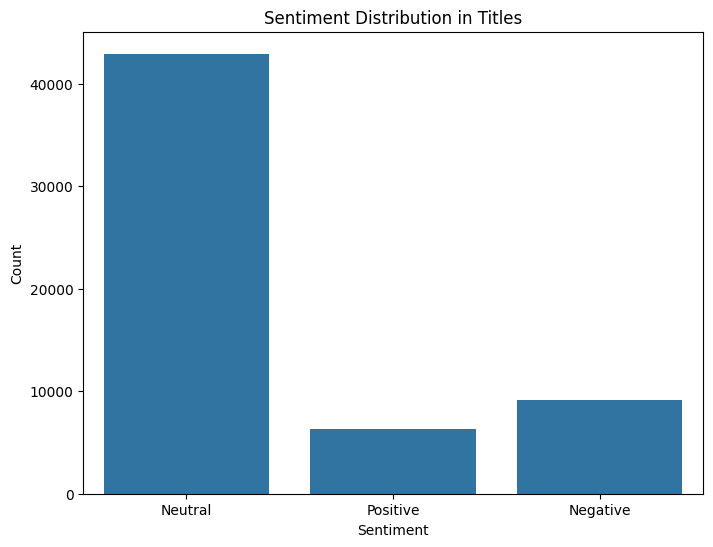

In [15]:
# Visualization

#Create a bar chart of sentiment analysis
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='title_sentiment')
plt.title('Sentiment Distribution in Titles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

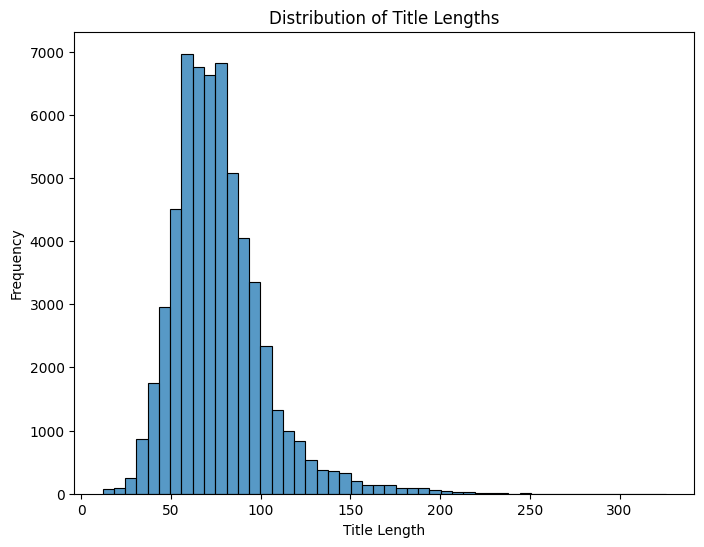

In [16]:
#Create a histrogram of title length
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='title_length',bins=50)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

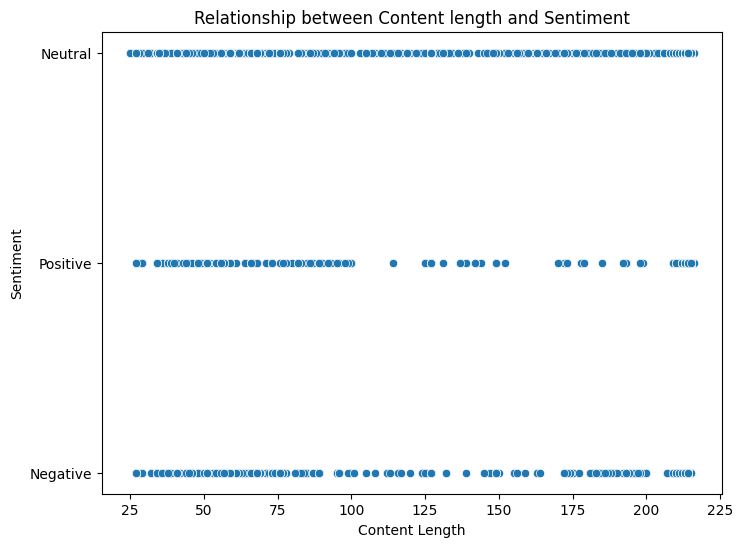

In [19]:
#Create scatter plot of content length and sentiment

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='content_length', y='title_sentiment')
plt.title('Relationship between Content length and Sentiment')
plt.xlabel('Content Length')
plt.ylabel('Sentiment')
plt.show()


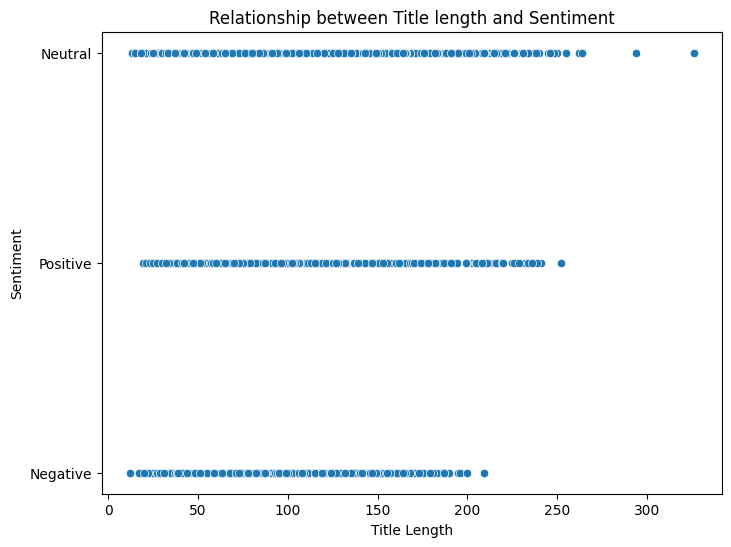

In [20]:
#Create scatter plot of title length and sentiment

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='title_length', y='title_sentiment')
plt.title('Relationship between Title length and Sentiment')
plt.xlabel('Title Length')
plt.ylabel('Sentiment')
plt.show()

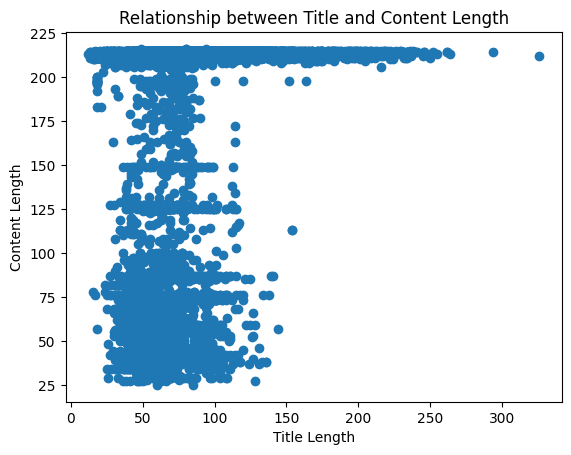

In [21]:
#Create a scatter plot of the title length vs content length

plt.scatter(df['title_length'], df['content_length'])
plt.xlabel('Title Length')
plt.ylabel('Content Length')
plt.title('Relationship between Title and Content Length')
plt.show()

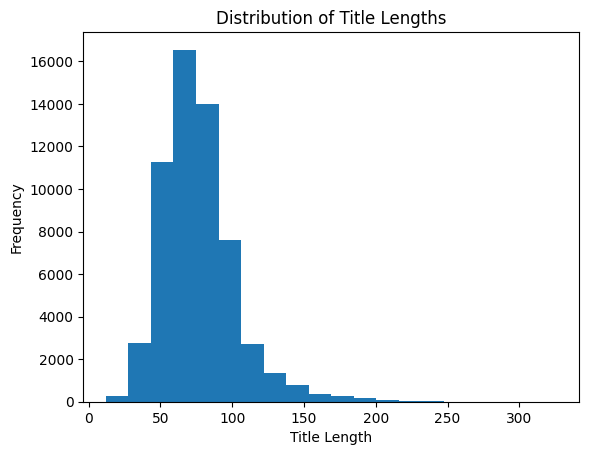

In [22]:
#Create a histrogram of title length

plt.hist(df['title_length'], bins=20)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Title Lengths')
plt.show()